支持向量机
支持向量机（简称SVM）是一个功能强大并且全面的机器学习
模型，它能够执行线性或非线性分类、回归，甚至是异常值检测任
务。它是机器学习领域最受欢迎的模型之一，任何对机器学习感兴趣
的人都应该在工具箱中配备一个。SVM特别适用于中小型复杂数据
集的分类。


线性SVM分类

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
np.random.seed(42)



In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM的基本思想可以用一些图来说明

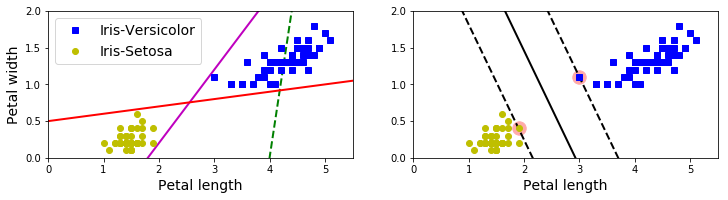

In [4]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# save_fig("large_margin_classification_plot")
plt.show()

上面所示的数据集来自
鸢尾花数据集的一部分。两个类别可以轻松地被一
条直线（它们是线性可分离的）分开。左图显示了三种可能的线性分
类器的决策边界。其中虚线所代表的模型表现非常糟糕，甚至都无法
正确实现分类。其余两个模型在这个训练集上表现堪称完美，但是它
们的决策边界与实例过于接近，导致在面对新实例时，表现可能不会
太好。相比之下，右图中的实线代表SVM分类器的决策边界，这条
线不仅分离了两个类别，并且尽可能远离了最近的训练实例。你可以
将SVM分类器视为在类别之间拟合可能的最宽的街道（平行的虚线
所示）。因此这也叫作大间隔分类（large margin classification）。

请注意，在街道以外的地方增加更多训练实例，不会对决策边界
产生影响：也就是说它完全由位于街道边缘的实例所决定（或者称之
为“支持”）。这些实例被称为支持向量（在图中已圈出）

SVM对特征的缩放非常敏感

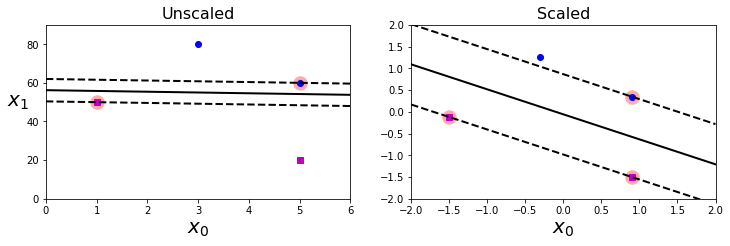

In [5]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

# save_fig("sensitivity_to_feature_scales_plot")
plt.show()

如上图所示，在左图中，垂
直刻度比水平刻度大得多，因此可能的最宽的街道接近于水平。在特
征缩放（例如使用Scikit-Learn的StandardScaler）后，决策边界看起来
好很多（见右图）

软间隔分类(Outlier 异常值)

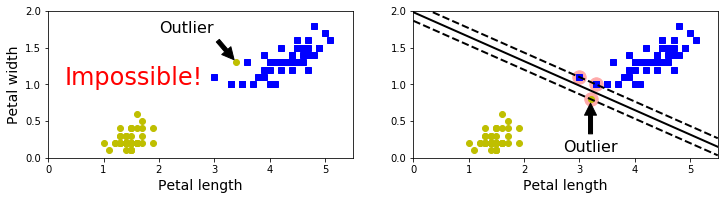

In [6]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

# save_fig("sensitivity_to_outliers_plot")
plt.show()

如果我们严格地让所有实例都不在街道上，并且位于正确的一
边，这就是硬间隔分类。硬间隔分类有两个主要问题，首先，它只在
数据是线性可分离的时候才有效；其次，它对异常值非常敏感。上图显示了有一个额外异常值的鸢尾花数据：左图的数据根本找不出硬
间隔，而右图最终显示的决策边界与之前图中中所看到的无异常
值时的决策边界也大不相同，可能无法很好地泛化。

要避免这些问题，最好使用更灵活的模型。目标是尽可能在保持
街道宽阔和限制间隔违例（即位于街道之上，甚至在错误的一边的实
例）之间找到良好的平衡，这就是软间隔分类。

下面这段Scikit-Learn代码：加载鸢尾花数据集，缩放特征，然后
训练一个线性SVM模型（使用LinearSVC类，C=0.1，用即将介绍的
hinge损失函数）用来检测Virginica鸢尾花。

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

按照惯例，你可以用模型做出预测

In [8]:
svm_clf.predict([[5.5, 1.7]])


array([ 1.])

与Logistic回归分类器不同的是，SVM分类器不会输出每个类别
的概率。
或者，你还可以选择SVC类，使用SVC（kernel="linear"，
C=1），但是这要慢得多，特别是对于大型训练集而言，因此不推荐
使用。另一个选择是SGDClassifier类，使用
SGDClassifier（loss="hinge"，alpha=1/（m*C））。这适用于常规随
机梯度下降（参见第4章）来训练线性SVM分类器。它不会像
LinearSVC类那样快速收敛，但是对于内存处理不了的大型数据集
（核外训练）或是在线分类任务，它非常有效。

LinearSVC类会对偏置项进行正则化，所以你需要先减去平均
值，使训练集集中。如果使用StandardScaler会自动进行这一步。此
外，请确保超参数loss设置为"hinge"，因为它不是默认值。最后，为
了获得更好的性能，还应该将超参数dual设置为False，除非特征数量
比训练实例还多

In [9]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [10]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

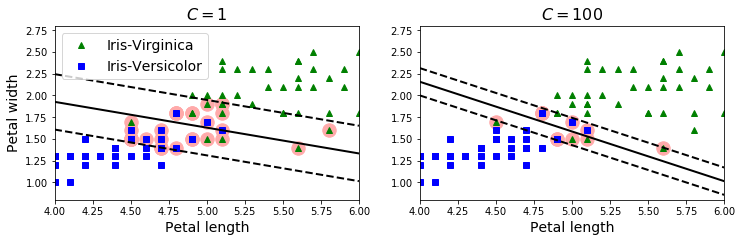

In [11]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

# save_fig("regularization_plot")

上图显示了在一个
非线性可分离数据集上，两个软间隔SVM分类器各自的决策边界和间隔。右边使用了高C值，分类器的间隔违例较少，但是间隔也较
小。左边使用了低C值，间隔大了很多，但是位于街道上的实例也更
多。看起来第二个分类器的泛化效果更好，因为大多数间隔违例实际
上都位于决策边界正确的一边，所以即便是在该训练集上，它做出的
错误预测也会更少。

如果你的SVM模型过度拟合，可以试试通过降低C来进行正则
化。

非线性SVM分类

虽然在许多情况下，线性SVM分类器是有效的，并且通常出人
意料的好，但是，有很多数据集远不是线性可分离的。处理非线性数
据集的方法之一是添加更多特征，比如多项式特征（如第4章所
述），某些情况下，这可能导致数据集变得线性可分离。

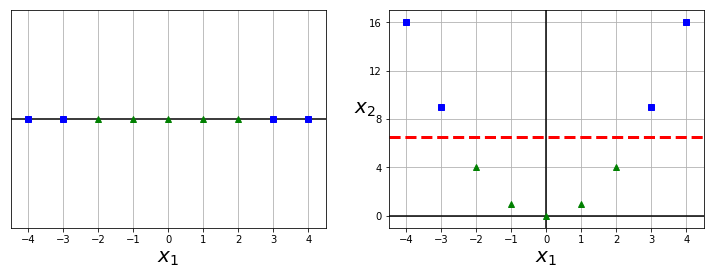

In [12]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

# save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

参见上图的左图：这是一个简单的数据集，只有一个特征x 1 ，可以看出，数据集线性不可分。但是如果添加第二个特征x 2 =（x 1 ） 2 ，生成的2D数据
集则完全线性可分离。

要使用Scikit-Learn实现这个想法，可以搭建一条流水线：一个
PolynomialFeatures转换器，接着一个StandardScaler，然后是
LinearSVC。我们用卫星数据集来测试一下

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [150, 9]

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# save_fig("moons_polynomial_svc_plot")
'''
使用多项式特征的线性LVM分类器
'''
plt.show()

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

多项式核
添加多项式特征实现起来非常简单，并且对所有的机器学习算法
（不只是SVM）都非常有效。但问题是，如果多项式太低阶，处理
不了非常复杂的数据集，而高阶则会创造出大量的特征，导致模型变
得太慢。

幸运的是，使用SVM时，有一个魔术般的数学技巧可以应用，
这就是核技巧（稍后解释）。它产生的结果就跟添加了许多多项式特
征，甚至是非常高阶的多项式特征一样，但实际上并不需要真的添
加。因为实际没有添加任何特征，所以也就不存在数量爆炸的组合特
征了。这个技巧由SVC类来实现，我们看看在卫星数据集上的测试：

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

上面这段代码使用了一个3阶多项式内核训练SVM分类器。

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

上面这段代码使用了一个10阶多项式内核训练SVM分类器。

In [ ]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

显然，如果模型过度拟合，你应该降低多项式阶数；反过来，如果拟合不足，则可以尝试使之提升。超参数coef0控制的是模型受高阶多项
式还是低阶多项式影响的程度。

寻找正确的超参数值的常用方法是网格搜索（见第2章）。先
进行一次粗略的网格搜索，然后在最好的值附近展开一轮更精细的网
格搜索，这样通常会快一些。多了解每个超参数实际上是用来做什么
的，有助于你在超参数空间层正确搜索。

In [ ]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

# save_fig("kernel_method_plot")
'''
使用高斯RBF的相似特征
'''
plt.show()

解决非线性问题的另一种技术是添加相似特征。这些特征经过相
似函数计算得出，相似函数可以测量每个实例与一个特定地标
（landmark）之间的相似度。以前面提到过的一维数据集为例，在
x 1 =-2和x 1 =1处添加两个地标（见上图中的左图）。接下来，我们采
用高斯径向基函数（RBF）作为相似函数，y=0.3

这是一个从0（离地标差得非常远）到1（跟地标一样）变化的钟
形函数。现在我们准备计算新特征。例如，我们看实例x 1 =-1：它与
第一个地标的距离为1，与第二个地标的距离为2。因此它的新特征为
x 2 =eps（-0.3×1 2 ）≈0.74，x 3 =eps（-0.3×2 2 ）≈0.30。上图的右图显示
了转换后的数据集（去除了原始特征），现在你可以看出，数据呈线
性可分离的了。

你可能想问怎么选择地标呢？最简单的方法是在数据集里每一个
实例的位置上创建一个地标。这会创造出许多维度，因而也增加了转
换后的训练集线性可分离的机会。缺点是，一个有m个实例n个特征
的训练集会被转换成一个m个实例m个特征的训练集（假设抛弃了原
始特征）。如果训练集非常大，那就会得到同样大数量的特征。

In [ ]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

高斯RBF核函数
与多项式特征方法一样，相似特征法也可以用任意机器学习算
法，但是要计算出所有附加特征，其计算代价可能非常昂贵，尤其是
对大型训练集来说。然而，核技巧再一次施展了它的SVM魔术：它
能够产生的结果就跟添加了许多相似特征一样，但实际上也并不需要
添加。我们来使用SVC类试试高斯RBF核：

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

# save_fig("moons_rbf_svc_plot")
'''
使用RBF核的SVM分类器
'''
plt.show()

上图的左下方显示了这个模型。其他图显示了超参数
gamma（）和C使用不同值时的模型。增加gamma值会使钟形曲线变
得更窄，因此每个实例的影响范围随之变小：决策
边界变得更不规则，开始围着单个实例绕弯。反过来，减小gamma值
使钟形曲线变得更宽，因而每个实例的影响范围增大，决策边界变得
更平坦。所以就像是一个正则化的超参数：模型过度拟合，就降低它
的值，如果拟合不足则提升它的值（类似超参数C）。

还有一些其他较少用到的核函数，例如专门针对特定数据结构的
核函数。字符串核常用于文本文档或是DNA序列（如使用字符串子
序列核或是基于莱文斯坦距离的核函数）的分类。

有这么多的核函数，该如何决定使用哪一个呢？有一个经验
法则是，永远先从线性核函数开始尝试（要记住，LinearSVC比
SVC（kernel="linear"）快得多），特别是训练集非常大或特征非常多
的时候。如果训练集不太大，你可以试试高斯RBF核，大多数情况下
它都非常好用。如果你还有多余的时间和计算能力，你可以使用交叉
验证和网格搜索来尝试一些其他的核函数，特别是那些专门针对你的
数据集数据结构的核函数。

计算复杂度

liblinear库为线性SVM实现了一个优化算法， [1] LinearSVC正是基
于该库的。这个算法不支持核技巧，不过它与训练实例的数量和特征数量几乎呈线性相关：其训练时间复杂度大致为O（m×n）

如果你想要非常高的精度，算法需要的时间更长。它由容差超参
数（在Scikit-Learn中为tol）来控制。大多数分类任务中，默认的容差
就够了。

SVC则是基于libsvm库的，这个库的算法支持核技巧。 [2] 训练时
间复杂度通常在O（m 2 ×n）和O（m 3 ×n）之间。很不幸，这意味着如
果训练实例的数量变大（例如上十万个实例），它将会慢得可怕，所
以这个算法完美适用于复杂但是中小型的训练集。但是，它还是可以
良好适应地特征数量的增加，特别是应对稀疏特征（即，每个实例仅
有少量的非零特征）。在这种情况下，算法复杂度大致与实例的平均
非零特征数成比例

SVM回归

如前面提到的，SVM算法非常全面：它不仅支持线性和非线
性分类，而且还支持线性和非线性回归。诀窍在于将目标反转一下：
不再是尝试拟合两个类别之间可能的最宽的街道的同时限制间隔违
例，SVM回归要做的是让尽可能多的实例位于街道上，同时限制间
隔违例（也就是不在街道上的实例）。街道的宽度由超参数ε控制。

In [ ]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

In [ ]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()

上图显示了用随机线性数据训练的两个线性SVM回归模型，一个间
隔较大（ε＝1.5），另一个间隔较小（ε＝0.5）。

在间隔内添加更多的实例不会影响模型的预测，所以这个模型被
称为ε不敏感

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

以下代码使用Scikit-Learn的SVR类（支持核技巧)。SVR类是SVC类的回归等价物，LinearSVR类也是
LinearSVC类的回归等价物。LinearSVR与训练集的大小线性相关
（跟LinearSVC一样），而SVR则在训练集变大时，变得很慢（SVC
也是一样）。

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

In [ ]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

In [ ]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
# save_fig("svm_with_polynomial_kernel_plot")
'''
使用二阶多项式核的SVM回归
'''
plt.show()

解决非线性回归任务，可以使用核化的SVM模型。例如，上图显示了在一个随机二次训练集上，使用二阶多项式核的SVM回
归。左图几乎没有正则化（C值很大），右图则过度正则化（C值很
小）。

工作原理

首先，说明一下符号：在第4章里，我们使用过一个约定——将
所有模型参数放在一个向量θ中，包括偏置项θ 0 ，以及输入特征的权
重θ 1 到θ n ，同时在所有实例中添加偏置项x 0 =1。在本章中，我们将会
使用另一个约定，在处理SVM时它更为方便（也更常见）：偏置项
表示为b，特征权重向量表示为w，同时输入特征向量中不添加偏置
特征。

决策函数和预测

线性SVM分类器通过简单地计算决策函数w T ·x+b=w 1 x 1 +…
+w n x n +b来预测新实例x的分类。如果结果为正，则预测类别 是正类
（1），不然则预测其为负类（0）

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
#     print(type(x2s))
    my = np.array([
        [0],
        [0]
    ])
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2s, my, color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^t \cdot \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

# save_fig("iris_3D_plot")
plt.show()

上图显示了图5-4右侧的模型所对应的决策函数：数据集包含
两个特征（花瓣宽度和长度），所以是一个二维平面。决策边界是决
策函数等于0的点的集合：它是两个平面的交集，也就是一条直线
（加粗实线所示）

线表示决策函数等于1或-1的点：它们互相平行，并且与决策
边界的距离相等，从而形成了一个间隔。训练线性SVM分类器即意
味着找到w和b的值，从而使这个间隔尽可能宽的同时，避免（硬间
隔）或是限制（软间隔）间隔违例。
[1] 更概括地说，当有n个特征时，决策函数是一个n维的超平面，决
策边界是一个（n-1）维的超平面

训练目标

思考一下决策函数的斜率：它等于权重向量的范数，即||w||。如
果我们将斜率除以2，那么决策函数等于±1的点也将变得离决策函数
两倍远。也就是说，将斜率除以2，将会使间隔乘以2。也许2D图更
容易将其可视化，

见下图。权重向量w越小，间隔越大

In [ ]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
# save_fig("small_w_large_margin_plot")
plt.show()

所以我们要最小化||w||来得到尽可能大的间隔。但是，如果我们
想避免任何间隔违例（硬间隔），那么就要使所有正类训练集的决策
函数大于1，负类训练集的决策函数小于-1。如果我们定义，实例为
负类（如果y （i） =0）时，t （i） =-1；实例为正类（如果y （i） =1）时，
t （i） =1。那么我们就可以将这个约束条件表示为：对所有实例来说，
t （i） （w T ·x （i） +b）≥1。
因此，我们可以将硬间隔线性SVM分类器的目标，看作一个约
束优化问题，